In [13]:
!python --version

Python 3.7.11


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [12]:

!which python

/usr/local/bin/python


### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)


terminal 명령어 실행하기 : !명령어  
**!pip install watermark**


In [9]:
# !pip install seaborn
# !pip install watermark

본 실습을 위해 필요한 패키지들의 설치여부를 watermark를 통해 확인해보도록 하겠습니다.

Mounted at /content/drive


In [5]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib,statsmodels,seaborn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.11
IPython version      : 5.5.0

sklearn    : 0.0
numpy      : 1.19.5
scipy      : 1.4.1
matplotlib : 3.2.2
statsmodels: 0.10.2
seaborn    : 0.11.1



In [6]:
import warnings
warnings.filterwarnings('ignore')


# **<선형 회귀분석 실습>**


<img src = "./fig/1_다중선형회귀분석가정.png" width="60%">
<center> [선형회귀분석가정] </center>

#### **설치가 필요한 라이브러리**

statsmodels, seaborn;patsy(의존성), scikit-learn
이상 3가지 라이브러리 설치가 요구됩니다.


기본적으로 sklearn에서 제공하는 linear_model 클래스를 통해서 회귀분석을 학습이 가능합니다.

__sklearn.linear_model.LinearRegression:__ 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

###### <font color='red'>scikit-learn</font>: Python 언어를 통한 머신러닝의 대부분을 손쉽게 사용가능하도록, numpy와 scipy를 기반을 작성된 라이브러리.
이를 통해서 간단하게 회귀분석을 실습해 보도록 하겠습니다.



In [7]:
import os
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import itertools
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab

#### 기본적으로 sklearn에서 제공하는 linear_model 클래스를 통해서 회귀분석을 학습이 가능합니다.

sklearn.linear_model.LinearRegression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

scikit-learn: Python 언어를 통한 머신러닝의 대부분을 손쉽게 사용가능하도록, numpy와 scipy를 기반을 작성된 라이브러리.
이를 통해서 간단하게 회귀분석을 실습해 보도록 하겠습니다.


## **실습예제1 : ram price 데이터셋**
#### 데이터 구조  
- 데이터: 1957년부터 2015년도 까지의 ram 가격 변화
- 관측치 개수: 333개
- 변수 개수: 독립변수:year 1개 / 반응변수:price 1개

### **예제 데이터 불러오기**

In [8]:
ram_prices = pd.read_csv('./data/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

FileNotFoundError: ignored

Text(0, 0.5, 'Raw Price')

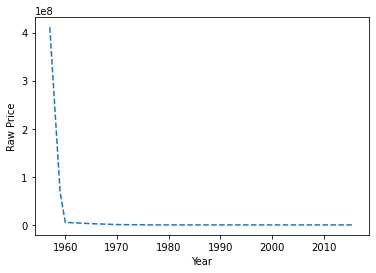

In [ ]:
plt.plot(ram_prices.date,ram_prices.price,'--')
plt.xlabel('Year')
plt.ylabel('Raw Price')

### sklearn.linear_model.LinearRegression( )함수를 이용해서 선형회귀를 수행해보겠습니다.

#### **[Parameters]**

**fit_intercept** : boolean, optional, default True
whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).

**normalize** : boolean, optional, default False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.

**copy_X** : boolean, optional, default True
If True, X will be copied; else, it may be overwritten.

**n_jobs** : int or None, optional (default=None)
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

#### **[Attributes]**

**coef_** : array, shape (n_features, ) or (n_targets, n_features)
Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

**intercept_** : array
Independent term in the linear model.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_lr = np.exp(pred_lr)

실제값과 예측된 값을 시각화하여 확인해보도록 하겠습니다.

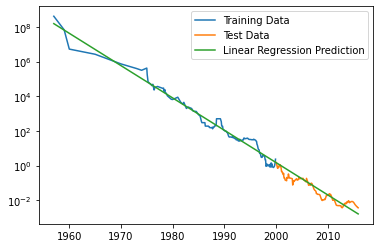

In [ ]:
plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Prediction")
plt.legend()

##### 회귀계수 확인해보기


In [ ]:
linear_reg.coef_
print('연도에 따른 회귀계수(로그변환):', linear_reg.coef_)

연도에 따른 회귀계수(로그변환): [-0.42880156]


#### **[Methods]**

**fit(X, y[, sample_weight])** -> Fit linear model.

**get_params([deep])** -> Get parameters for this estimator.

**predict(X)**  -> Predict using the linear model

**score(X, y[, sample_weight])** -> Returns the coefficient of determination $$R^2$$ of the 
prediction.


In [ ]:
from IPython.display import display, HTML

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 성능 평가 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## **실습예제2 : California Housing Data**
#### 데이터 구조  
- 데이터: 1990년 캘리포니아의 각 행정 구역 내 주택 가격  
- 관측치 개수: 20640개
- 변수 개수: 설명변수 8개 / 반응변수 1개

#### 설명 변수(예측값을 설명할 수 있는 변수)      
- MedInc : 행정 구역 내 소득의 중앙값
- HouseAge : 행정 구역 내 주택 연식의 중앙값
- AveRooms : 평균 방 갯수
- AveBedrms : 평균 침실 갯수
- Population : 행정 구역 내 인구 수
- AveOccup : 평균 자가 비율
- Latitude : 해당 행정 구역의 위도
- Longitude : 해당 행정 구역의 경도 

#### 반응 변수(예측하고자 하는 값)
- House Value: 주택가격

In [ ]:
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [ ]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['House Value'])

#### 데이터 전처리

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y.head()

,House Value
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
data = pd.concat([X, y], axis=1)

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 모델을 학습(train) 및 테스트(test) 데이터로 분리
<br>

![image.png](attachment:image.png)
<br>

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=20190625)

In [ ]:
train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
9795,6.5234,18.0,7.292627,1.228111,1312.0,3.023041,36.52,-121.84,3.574
10164,4.4375,24.0,5.791304,1.095652,625.0,2.717391,33.89,-117.96,3.341
4647,2.1435,52.0,2.809524,1.000000,1920.0,2.539683,34.06,-118.31,3.289
16452,2.1979,52.0,4.804444,1.142222,437.0,1.942222,38.13,-121.27,1.141
11613,4.8000,21.0,4.603774,1.056604,1215.0,2.547170,33.80,-118.06,1.969


In [ ]:
train_data.shape

(14448, 9)

In [ ]:
test_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
4051,3.2241,28.0,4.188377,1.139613,2549.0,1.702739,34.15,-118.43,2.958
17595,3.3682,40.0,6.045902,1.114754,719.0,2.357377,37.31,-121.89,2.352
7100,5.6454,33.0,5.642298,1.000000,1235.0,3.224543,33.90,-117.99,2.028
7263,2.1912,37.0,2.423077,1.128205,714.0,4.576923,33.99,-118.23,1.125
12717,5.8336,36.0,7.460000,0.960000,414.0,2.760000,38.60,-121.37,2.833


In [ ]:
test_data.shape

(6192, 9)

#### 모델링
 - OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β1, β2 ...) 구하는 방법
 - 모델 선언: model = sm.OLS(Y데이터, X데이터)   
 - 모델 학습: model_trained = model.fit()

In [ ]:
lm = sm.OLS(train_data['House Value'], train_data.drop(['House Value'], axis=1))

In [ ]:
lm_trained = lm.fit()

#### 모델 해석

In [ ]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.506e+04
Date:                Sun, 13 Jun 2021   Prob (F-statistic):                        0.00
Time:                        17:51:08   Log-Likelihood:                         -16809.
No. Observations:               14448   AIC:                                  3.363e+04
Df Residuals:                   14440   BIC:                                  3.369e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5071      0.005    101.645      0.000       0.497       0.517
HouseAge       0.0164      0.001     29.841      0.000       0.015       0.017
AveRooms      -0.1721      0.007    -23.757      0.000      -0.186      -0.158
AveBedrms      0.8081      0.035     23.416      0.000       0.740       0.876
Population   1.48e-05   6.12e-06      2.418      0.016     2.8e-06    2.68e-05
AveOccup      -0.0059      0.001     -5.963      0.000      -0.008      -0.004
Latitude      -0.0633      0.004    -14.867      0.000      -0.072      -0.055
Longitude     -0.0162      0.001    -11.987      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     2967.936   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10128.918
Skew:                           1.024   Prob(JB):                         0.00
Kurtosis:                       6.554   Cond. No.                     9.92e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 예측 값 도출 및 예측 성능 평가

### 학습 데이터 (Training Data)에 대한 (1) 예측 및 (2) 성능 평가

In [ ]:
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
9795,6.5234,18.0,7.292627,1.228111,1312.0,3.023041,36.52,-121.84,3.574
10164,4.4375,24.0,5.791304,1.095652,625.0,2.717391,33.89,-117.96,3.341
4647,2.1435,52.0,2.809524,1.000000,1920.0,2.539683,34.06,-118.31,3.289
16452,2.1979,52.0,4.804444,1.142222,437.0,1.942222,38.13,-121.27,1.141
11613,4.8000,21.0,4.603774,1.056604,1215.0,2.547170,33.80,-118.06,1.969
...,...,...,...,...,...,...,...,...,...
879,3.8179,24.0,5.115768,0.968064,1174.0,2.343313,37.56,-122.01,2.161
13751,5.0227,9.0,6.269565,0.952174,633.0,2.752174,34.05,-117.15,1.623
8520,2.6091,21.0,3.783954,1.136963,5546.0,3.178223,33.90,-118.33,1.639
1727,0.7403,37.0,4.491429,1.148571,1046.0,2.988571,37.96,-122.37,0.686


In [ ]:
train_pred = lm_trained.predict(train_data.drop(['House Value'], axis=1))

In [ ]:
train_pred

9795     3.000859
10164    2.288211
4647     2.034998
16452    1.605928
11613    2.612775
           ...   
879      1.830746
13751    2.117512
8520     1.766321
1727     0.711405
14245    1.386619
Length: 14448, dtype: float64

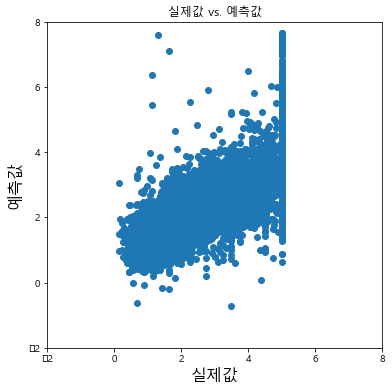

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('실제값 vs. 예측값')
plt.scatter(train_data['House Value'], train_pred)
plt.xlabel('실제값', size=16)
plt.ylabel('예측값', size=16)
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
print('Training MSE: {:.3f}'.format(mean_squared_error(train_data['House Value'], train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(train_data['House Value'], train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(train_data['House Value'], train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(train_data['House Value'], train_pred)))
print('Training R2: {:.3f}'.format(r2_score(train_data['House Value'], train_pred)))

Training MSE: 0.600
Training RMSE: 0.775
Training MAE: 0.572
Training MAPE: 34.807
Training R2: 0.552


### 테스트 데이터 (Testing Data)에 대한 예측 성능 평가

In [ ]:
test_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
4051,3.2241,28.0,4.188377,1.139613,2549.0,1.702739,34.15,-118.43,2.958
17595,3.3682,40.0,6.045902,1.114754,719.0,2.357377,37.31,-121.89,2.352
7100,5.6454,33.0,5.642298,1.000000,1235.0,3.224543,33.90,-117.99,2.028
7263,2.1912,37.0,2.423077,1.128205,714.0,4.576923,33.99,-118.23,1.125
12717,5.8336,36.0,7.460000,0.960000,414.0,2.760000,38.60,-121.37,2.833
...,...,...,...,...,...,...,...,...,...
17647,3.5625,32.0,5.016373,1.103275,1989.0,2.505038,37.26,-121.91,2.552
16862,4.2262,37.0,4.362369,0.958188,878.0,3.059233,37.63,-122.41,2.285
16615,3.6908,23.0,7.406475,1.273381,636.0,2.287770,35.40,-120.92,2.788
6435,3.5625,43.0,5.647416,1.048632,1054.0,3.203647,34.11,-118.01,2.116


In [ ]:
test_pred = lm_trained.predict(test_data.drop(['House Value'], axis=1))

In [ ]:
display(test_pred)

4051     2.075514
17595    1.830442
7100     3.002480
7263     1.956814
12717    2.549611
           ...   
17647    1.987220
16862    2.366030
16615    1.713752
6435     2.133077
17715    2.541404
Length: 6192, dtype: float64

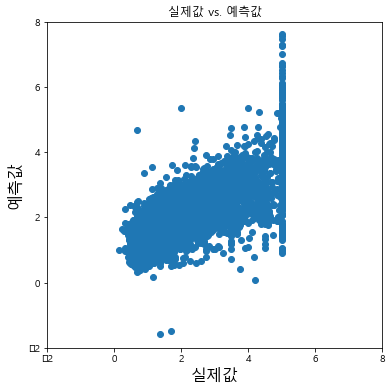

Testing MSE: 0.616
Testing RMSE: 0.785
Testing MAE: 0.576
Testing MAPE: 34.388
Testing R2: 0.532


In [ ]:
plt.figure(figsize=(6, 6))
plt.title('실제값 vs. 예측값')
plt.scatter(test_data['House Value'], test_pred)
plt.xlabel('실제값', size=16)
plt.ylabel('예측값', size=16)
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.show()

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data['House Value'], test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data['House Value'], test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(test_data['House Value'], test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(test_data['House Value'], test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(test_data['House Value'], test_pred)))

## **실습예제3 : BostonHouse 데이터셋**
#### **보스턴하우스데이터설명** 
<img src = "./fig/4_보스턴하우스데이터셋.png" width="60%">


#### **데이터 불러오기**

예제 데이터(주택가격예측:Boston_data)를 활용해서 회귀를 수행해보도록 하겠습니다.
처음에는 회귀분석을 위한 파이썬 라이브러리는 크게 sckit-learn 과 statsmodels가 있습니다.
statsmodels의 경우, 통계기반의 다양한 회귀분석 모형에 특화된 패키지입니다. 
scikit-learn의 경우, 다양한 기계학습 방법론을 통합하여 제공하는 패키지 입니다.
우선, statsmodels 패키지를 활용하여 선형 회귀분석의 다양한 결과를 도출하고 해석하는 방법을 실습해 보도록 하겠습니다.

In [ ]:
# 현재경로 확인
os.getcwd()

'D:\\dev\\머신러닝기초\\머신러닝 기초\\python 실습 1_다중선형회귀분석'

In [ ]:
# 데이터 불러오기
boston = pd.read_csv("./data/Boston_house.csv")
print(boston.head())

    AGE       B     RM     CRIM     DIS  INDUS  LSTAT    NOX  PTRATIO  RAD  \
0  65.2  396.90  6.575  0.00632  4.0900   2.31   4.98  0.538     15.3    1   
1  78.9  396.90  6.421  0.02731  4.9671   7.07   9.14  0.469     17.8    2   
2  61.1  392.83  7.185  0.02729  4.9671   7.07   4.03  0.469     17.8    2   
3  45.8  394.63  6.998  0.03237  6.0622   2.18   2.94  0.458     18.7    3   
4  54.2  396.90  7.147  0.06905  6.0622   2.18   5.33  0.458     18.7    3   

     ZN  TAX  CHAS  Target  
0  18.0  296     0    24.0  
1   0.0  242     0    21.6  
2   0.0  242     0    34.7  
3   0.0  222     0    33.4  
4   0.0  222     0    36.2  


In [ ]:
##### EDA
# Data format
print("number of observation in data : {}".format(boston.shape[0]))
print("number of Variables in Data  : {}".format(boston.shape[1]))

number of observation in data : 506
number of Variables in Data  : 14


In [ ]:
boston_data = boston.drop(['Target'],axis=1)
# boston_data

In [ ]:
boston_target = boston['Target']
# boston_target

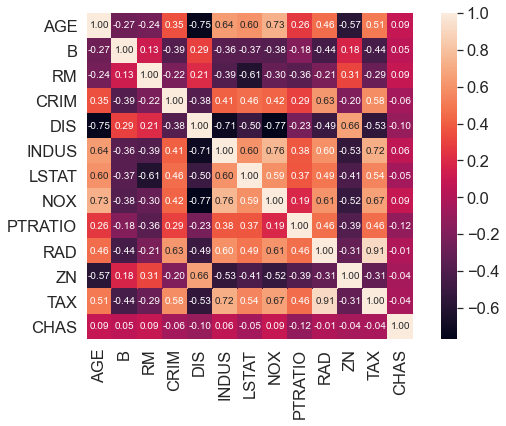

In [ ]:
# correlation analysis
colnames = list(boston_data.columns.values)
X_cm = np.corrcoef(boston_data[colnames].values.T)
sns.set(font_scale=1.5)

plt.figure(figsize=(10,6))
X_hm = sns.heatmap(X_cm, cbar=True, annot=True, square=True, fmt='.2f',
                         annot_kws={'size':10},yticklabels=colnames,xticklabels=colnames)
plt.show()

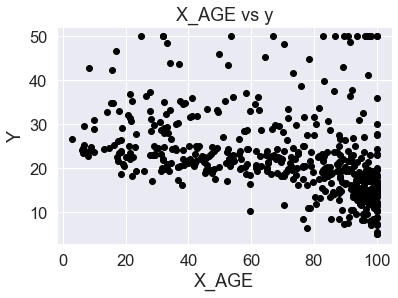

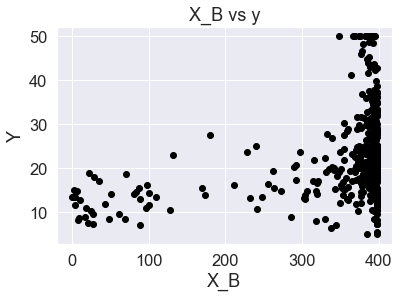

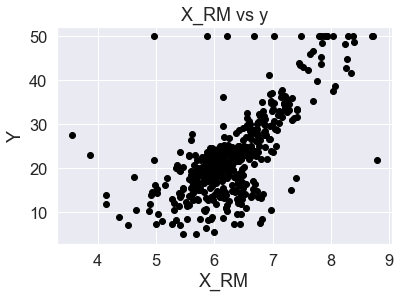

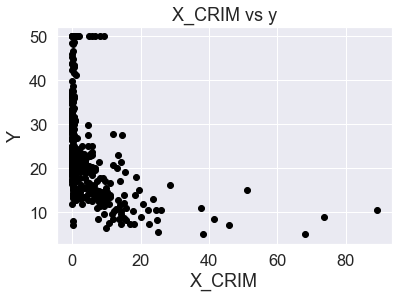

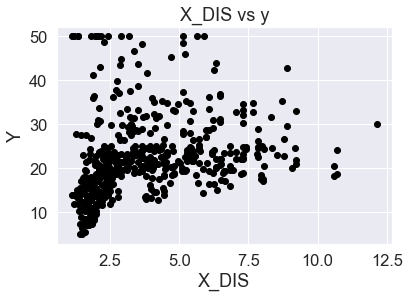

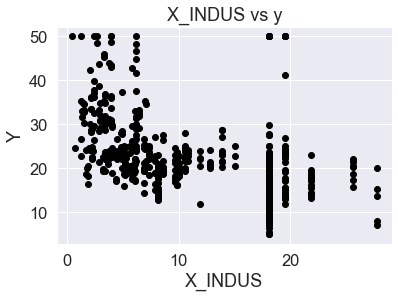

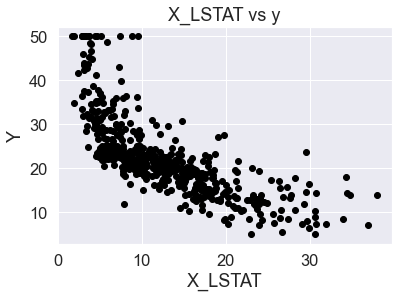

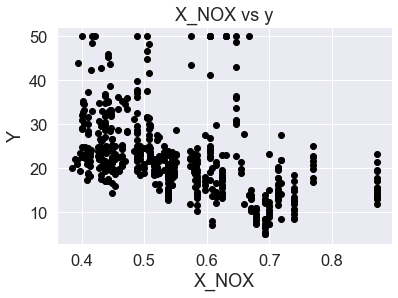

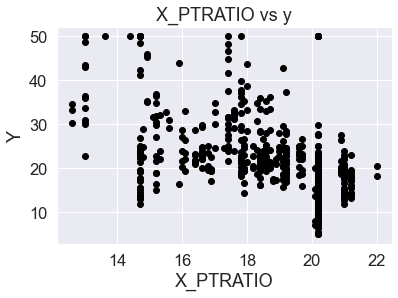

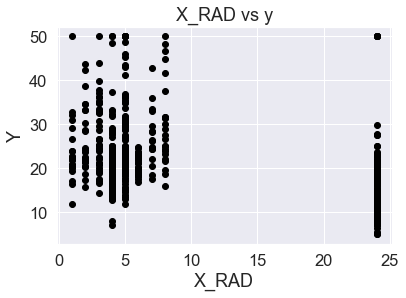

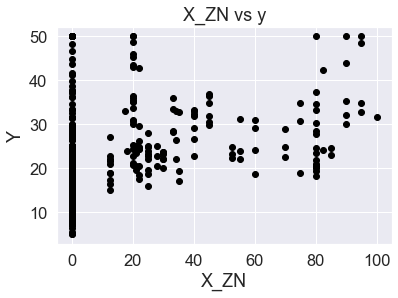

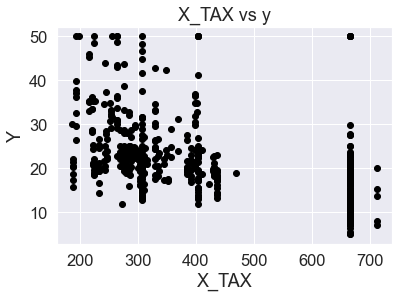

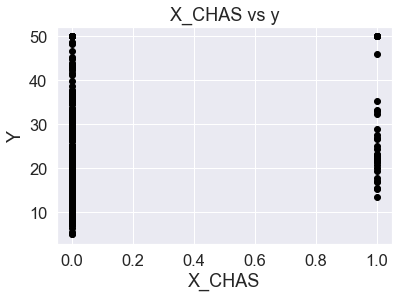

In [ ]:
# each X vs Y
for i in range(0,len(colnames)):
    plt.scatter(boston_data.iloc[:,i], boston_target,  color='black')
    plt.title('X_{} vs y'.format(colnames[i]))
    plt.xlabel('X_{}'.format(colnames[i]))
    plt.ylabel('Y')
    plt.show()

In [ ]:
# split train to test
X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


**statsmodels** 패키지에서 제공하는 **sm.OLS( )** 메소드를 통해서 모델의 학습데이터를 정의합니다.

In [ ]:
# Training the Multivariate Linear Regression Model
lm = sm.OLS(y_train, X_train)

정의된 **"lm"** 클래스 객체에서 **.fit( )** 메소드함수를 통해서 실제 모델학습을 수행합니다.

In [ ]:
lm_trained = lm.fit()

In [ ]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              609.7
Date:                Sun, 13 Jun 2021   Prob (F-statistic):                   4.82e-227
Time:                        17:51:11   Log-Likelihood:                         -1072.0
No. Observations:                 354   AIC:                                      2170.
Df Residuals:                     341   BIC:                                      2220.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0062      0.017     -0.371      0.711      -0.039       0.027
B              0.0167      0.003      5.121      0.000       0.010       0.023
RM             6.2621      0.379     16.514      0.000       5.516       7.008
CRIM          -0.0467      0.055     -0.851      0.395      -0.155       0.061
DIS           -0.9471      0.236     -4.021      0.000      -1.410      -0.484
INDUS          0.0046      0.079      0.058      0.954      -0.151       0.161
LSTAT         -0.3983      0.064     -6.252      0.000      -0.524      -0.273
NOX           -6.5672      4.098     -1.602      0.110     -14.628       1.494
PTRATIO       -0.4467      0.136     -3.281      0.001      -0.714      -0.179
RAD            0.1566      0.086      1.814      0.070      -0.013       0.326
ZN             0.0303      0.018      1.657      0.099      -0.006       0.066
TAX           -0.0093      0.005     -1.851      0.065      -0.019       0.001
CHAS           2.1110      1.073      1.967      0.050      -0.000       4.222
==============================================================================
Omnibus:                      151.512   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1093.332
Skew:                           1.624   Prob(JB):                    3.85e-238
Kurtosis:                      10.973   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

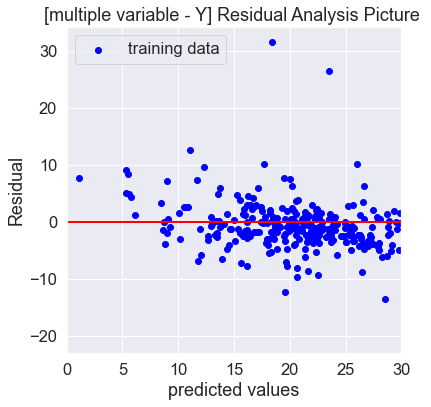

In [ ]:
# Check the Model Assumption: residual by scatter plot
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid , c = 'blue', marker = 'o', label = 'training data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.hlines(y=0,xmin=0,xmax=30,lw=2,color='red')
plt.xlim([-0,30])
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()


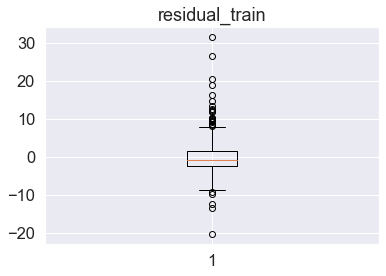

In [ ]:
plt.figure()
plt.boxplot(lm_trained.resid)
plt.title('residual_train')
plt.show()

In [ ]:
# prediction y_train
y_pred_train = lm_trained.predict(X_train)
print(y_pred_train.head(10))

12     19.789427
353    26.523574
15     20.002919
496    13.755876
308    28.726345
476    21.362267
384     1.072869
487    20.137656
397    16.155088
492    17.401283
dtype: float64


In [ ]:
# prediction y_test
y_pred_test = lm_trained.predict(X_test)
print(y_pred_test.head(10))

480    22.634949
118    18.907379
148     9.839134
311    25.752698
500    20.702434
53     22.864409
150    21.553494
490     4.194413
204    42.753290
129    15.195382
dtype: float64


### performance measure:

### 실제값 - 모델 출력 값 산점도를 통한 비교

In [ ]:
lm_trained.fittedvalues

12     19.789427
353    26.523574
15     20.002919
496    13.755876
308    28.726345
         ...    
10     19.792290
62     24.705517
117    22.474690
259    32.963223
275    32.739275
Length: 354, dtype: float64

In [ ]:
y_predicted = lm_trained.predict(X_test)
y_predicted.head()

480    22.634949
118    18.907379
148     9.839134
311    25.752698
500    20.702434
dtype: float64

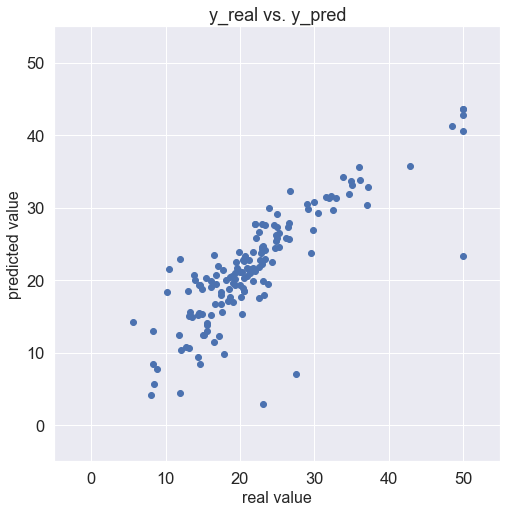

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('y_real vs. y_pred')
plt.scatter(y_test, y_predicted)
plt.xlabel('real value', size=16)
plt.ylabel('predicted value', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

### 모델 출력 값 평가를 위한 지표들

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


###  Mean Squared Error (평균 제곱 오차): <br>
$\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$   

In [ ]:
print(mean_squared_error(y_test, y_predicted))

23.215983382703378


###  Root Mean Squared Error (제곱근 평균 제곱 오차): <br>
$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$

In [ ]:
print(np.sqrt(mean_squared_error(y_test,y_predicted)))

4.818296730453966


### Mean Absolute Error (평균 절대 오차): <br>
$\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$



In [ ]:
print(mean_absolute_error(y_test, y_predicted))

3.142452147311243


###  Mean Absolute Percentage Error (평균 절대 백분율 오차): <br>
$\frac{1}{n}\sum_{i=1}^{n} \left|\frac{y_{i} - \hat{y}_{i}}{y_{i}} \right| \times 100\%$

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test, y_predicted))

16.75330956293683


###  Correlation Coefficient (상관계수)

In [ ]:
print(np.corrcoef(y_test, y_predicted))

[[1.         0.83377329]
 [0.83377329 1.        ]]


###  R squared (결정계수 $({r})^{2}$):
$\frac{SSR}{SST} = 1- \frac{SSR}{SST}%$
    

In [ ]:
print(r2_score(y_test, y_predicted))

0.6912847486198179


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# MSE: Mean of Squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mse_train: %.2f, mse_test: %.2f"
      %(mse_train,mse_test))

mse_train: 25.00, mse_test: 23.22


In [ ]:
# MAE: Mean of Absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("mae_train: %.2f, mae_test: %.2f"
      %(mae_train,mae_test))

mae_train: 3.32, mae_test: 3.14


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# MAPE: Mean of absolute percent error
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("mape_train: %.2f, mape_test: %.2f"
      %(mape_train,mape_test))



mape_train: 17.43, mape_test: 16.75


In [ ]:
# R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("r2_train: %.2f, r2_test: %.2f"
      %(r2_train,r2_test))

r2_train: 0.72, r2_test: 0.69


#### **잔차분석**
잔차를 통해 회귀분석의 가정에 적합한지 여부를 잔차도를 통해서 확인해보도록 하겠습니다.

<img src = "./fig/2_잔차의정규성.png" width="60%">
<center> [잔차의 정규성] </center>

<img src = "./fig/3_잔차도.png" width="60%">
<center> [이상적인 잔차 plot] </center>

In [ ]:
# residual
residual_train = y_pred_train - y_train
residual_test = y_pred_test - y_test
print(residual_train.head(10))
print(residual_test.head(10))


12    -1.910573
353   -3.576426
15     0.102919
496   -5.944124
308    5.926345
476    4.662267
384   -7.727131
487   -0.462344
397    7.655088
492   -2.698717
dtype: float64
480   -0.365051
118   -1.492621
148   -7.960866
311    3.652698
500    3.902434
53    -0.535591
150    0.053494
490   -3.905587
204   -7.246710
129    0.895382
dtype: float64


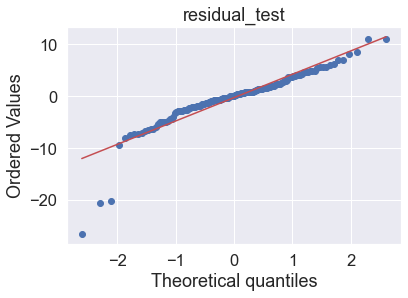

In [ ]:
stats.probplot(residual_test, dist="norm", plot=pylab)
plt.title('residual_test')
pylab.show()

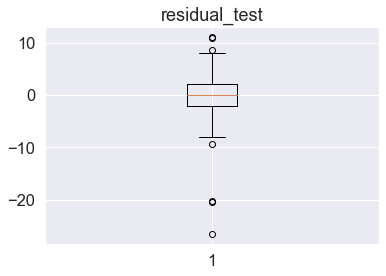

In [ ]:
plt.figure()
plt.boxplot(residual_test)
plt.title('residual_test')
plt.show()

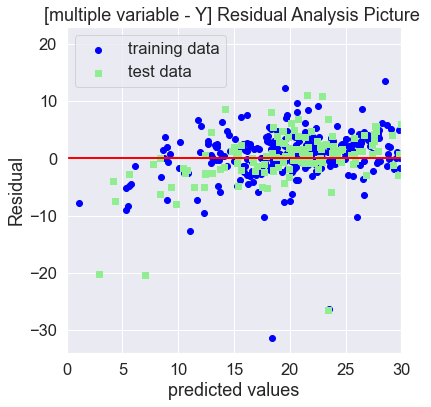

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred_train, residual_train , c = 'blue', marker = 'o', label = 'training data')
plt.scatter(y_pred_test, residual_test , c = 'lightgreen', marker = 's', label = 'test data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.hlines(y=0,xmin=0,xmax=30,lw=2,color='red')
plt.xlim([-0,30])
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()


## scikit-learng 라이브러리를 활용한 선형회귀분석 함수 정의하기

다음으로는 동일한 과정을 scikit-learn에서 제공하는 linear_model 모듈을 이용해서 선형회귀분석을 수행해보겠습니다.
각 함수명은 다르지만 모두 동일한 과정을 통해서 모델을 적합하고, 예측을 수행하게 됩니다.

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

### 학습데이터 정의
보스턴 데이터에서 6개의 변수만을 사용해서  실습을 해보도록 하겠습니다.


In [ ]:
boston_x = boston_data.iloc[:,:5]
boston_y = boston_target

In [ ]:
print( boston_x[:10] )
print( boston_y[:10] )

     AGE       B     RM     CRIM     DIS
0   65.2  396.90  6.575  0.00632  4.0900
1   78.9  396.90  6.421  0.02731  4.9671
2   61.1  392.83  7.185  0.02729  4.9671
3   45.8  394.63  6.998  0.03237  6.0622
4   54.2  396.90  7.147  0.06905  6.0622
5   58.7  394.12  6.430  0.02985  6.0622
6   66.6  395.60  6.012  0.08829  5.5605
7   96.1  396.90  6.172  0.14455  5.9505
8  100.0  386.63  5.631  0.21124  6.0821
9   85.9  386.71  6.004  0.17004  6.5921
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: Target, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error

### 모델 학습(fitting) & 예측(predict)

In [ ]:
LR.fit(X=boston_x,y=boston_y)

LinearRegression()

In [ ]:
boston_mse = mean_squared_error(y_true= boston_y, y_pred= LR.predict(boston_x))

In [ ]:
print( "Training Mean_Squared_Error is : {}".format( round(boston_mse,4)))

print( "Training RMSE is :{}".format( round(np.sqrt(boston_mse),4)))

Training Mean_Squared_Error is : 33.7499
Training RMSE is :5.8095


## **실습예제4 : 도요타 코롤라 중고차 가격 데이터셋**
또다른 예제 데이터(중고차데이터:ToyotaCorolla 데이터셋)를 활용해서 회귀를 수행해보도록 하겠습니다.

- 사양에 따른 도요타 중고차 차량의 가격예측
- 사양정보에 따른 도요타 중고차 1,442대의 가격 데이터셋
- 사용된 변수들
    - 판매가격 (Euros)
    - 내용연수 (2004년 8월 현재)
    - 연비 (kilometers)
    - 연료유형 (diesel, petrol, CNG)
    - 마력 (horsepower)
    - 금속색상 (1=yes, 0=no)
    - 자동변속 (1=yes, 0=no)
    - 실린더 부피 (cylinder volume)
    - 자동차 문의 개수
    - 분기별 도로 사용세(road tax)
    - 무게 (kg)


##### 해당 변수들을 사용하기에 앞서서 **범주형 변수들은 이항변수로 변환**하는 과정이 필요합니다.
- Diesel (1=yes, 0=no)
- CNG (1=yes, 0=no)
- None needed for “Petrol” (reference category)

### 데이터 불러오기

In [ ]:
# 데이터 불러오기
corolla = pd.read_csv("./data/ToyotaCorolla.csv")
print(corolla.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ...  Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...             1   
1         10      2002  72937    Diesel  90          1  ...             1   
2          9      2002  41711    Diesel  90          1  ...             0   
3          7      2002  48000    Diesel  90          0  ...             0   
4          3      2002  38500    Diesel  90          0  ...             1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                

### 데이터 관측치 갯수(nCar)와 변수의 수(nVar) 확인

In [ ]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1436 nVar: 37


# 데이터 전처리

## 범주형 변수를 이진형 변수로 변환

In [ ]:
# 가변수 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [ ]:

# 연료타입에 대한 위치 인덱스를 저장  
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [ ]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1  # Petrol
dummy_d[d_idx] = 1  # Diesel
dummy_c[c_idx] = 1  # CNG

## 불필요한 변수 제거 및 가변수 추가

In [ ]:
# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# column slice
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)

In [ ]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 

In [ ]:
feature_columns = list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


# 선형회귀모형 모델링 y = f(x)

In [ ]:
# Train the MLR
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

## 학습에 유의미한 변수확인

|Element|Description|
|:----|:-----------|
|Dep. Variable |	Which variable is the response in the model|
|Model|	What model you are using in the fit|
|Method|	How the parameters of the model were calculated|
|No. Observations|	The number of observations (examples)|
|DF Residuals|	Degrees of freedom of the residuals. Number of observations – number of parameters|
|DF Model|	Number of parameters in the model (not including the constant term if present)|
|R-squared|	The coefficient of determination. A statistical measure of how well the regression line approximates the real data points|
|Adj. R-squared|	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals|
|F-statistic|	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals|
|Prob (F-statistic)|	The probability that you would get the above statistic, given the null hypothesis that they are unrelated|
|Log-likelihood|	The log of the likelihood function.|
|AIC|	The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.|
|BIC|	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.|


|Element|Description|
|:----|:-----------|
|coef|	The estimated value of the coefficient|
|std err|	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.|
|t	|The t-statistic value. This is a measure of how statistically significant the coefficient is.|
|P > ㅣtㅣ|	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.|
|[95.0% Conf. Interval]|The lower and upper values of the 95% confidence interval|

|Element|Description|
|:----|:-----------|
|Skewness|	A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).|
|Kurtosis|	A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).|
|Omnibus|	D’Angostino’s test. It provides a combined statistical test for the presence of skewness and kurtosis.|
|Prob(Omnibus)|	The above statistic turned into a probability|
|Jarque-Bera|	A different test of the skewness and kurtosis|
|Prob (JB)|	The above statistic turned into a probability|
|Durbin-Watson|	A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis|
|Cond. No|	A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).|

In [ ]:
fitted_full_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     297.2
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:51:13   Log-Likelihood:                -8461.0
No. Observations:                1005   AIC:                         1.699e+04
Df Residuals:                     971   BIC:                         1.716e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -202.4540    137.381     -1.474      0.141    -472.052      67.144
Age_08_04         -119.6512      4.153    -28.808      0.000    -127.802    -111.501
Airbag_1           126.9969    295.899      0.429      0.668    -453.679     707.673
Airbag_2          -118.6408    141.548     -0.838      0.402    -396.415     159.133
Airco              225.2949     95.485      2.359      0.018      37.915     412.675
Automatic          530.3615    156.958      3.379      0.001     222.347     838.376
Automatic_airco   2340.4302    198.211     11.808      0.000    1951.459    2729.402
BOVAG_Guarantee    439.3210    137.858      3.187      0.001     168.787     709.855
Backseat_Divider   -56.5628    139.908     -0.404      0.686    -331.120     217.994
Boardcomputer     -395.3939    123.287     -3.207      0.001    -637.333    -153.454
CD_Player          188.3535    106.878      1.762      0.078     -21.385     398.092
CNG              -1953.8109    279.928     -6.980      0.000   -2503.145   -1404.477
Central_Lock        31.0129    160.947      0.193      0.847    -284.832     346.857
Cylinders           -0.0273      0.002    -11.292      0.000      -0.032      -0.023
Diesel            1696.6253    319.678      5.307      0.000    1069.286    2323.965
Doors              100.2012     43.590      2.299      0.022      14.660     185.743
Gears              -43.4054    203.815     -0.213      0.831    -443.374     356.563
Guarantee_Period    75.9339     14.803      5.130      0.000      46.884     104.984
HP                  53.5088      5.942      9.005      0.000      41.848      65.170
KM                  -0.0162      0.001    -11.832      0.000      -0.019      -0.014
Met_Color           21.1158     80.463      0.262      0.793    -136.785     179.016
Metallic_Rim       256.9483    102.169      2.515      0.012      56.451     457.446
Mfg_Month          -90.6048     10.989     -8.245      0.000    -112.169     -69.041
Mfg_Year             3.8468      0.892      4.314      0.000       2.097       5.597
Mfr_Guarantee      191.5132     78.667      2.434      0.015      37.136     345.891
Mistlamps            8.5371    114.245      0.075      0.940    -215.658     232.733
Petrol             257.1788    242.729      1.060      0.290    -219.155     733.513
Power_Steering    -330.0358    335.284     -0.984      0.325    -988.000     327.929
Powered_Windows    346.9541    160.822      2.157      0.031      31.355     662.553
Quarterly_Tax       14.8799      1.929      7.713      0.000      11.094      18.666
Radio             -465.0620    816.893     -0.569      0.569   -2068.142    1138.018
Radio_cassette     442.7284    819.165      0.540      0.589   -1164.809    2050.266
Sport_Model        370.3652     92.700      3.995      0.000     188.450     552.280
Tow_Bar           -117.

## 그래프로 모델링 적합성 확인

### 정규분포 확인

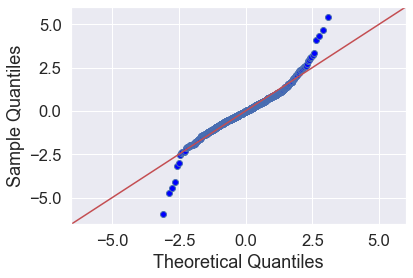

In [ ]:
# 학습데이터의 잔차 확인
pred_y = fitted_full_model.predict(train_x)
res = fitted_full_model.resid  # residual

# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

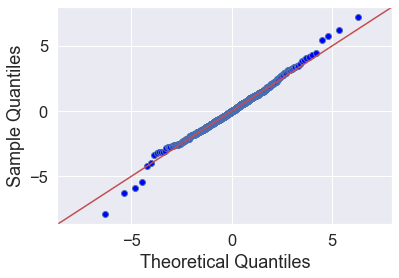

In [ ]:
# 학습데이터의 잔차 확인
pred_y = fitted_full_model.predict(train_x)
res = fitted_full_model.resid  # residual

# q-q plot # 정규분포 확인
fig = sm.qqplot(res, stats.t, fit=True, line='45')

### 이상관측치탐색

* Residuals: Y에서 벗어나는 정도
* Leverage: X에서 벗어나는 정도 

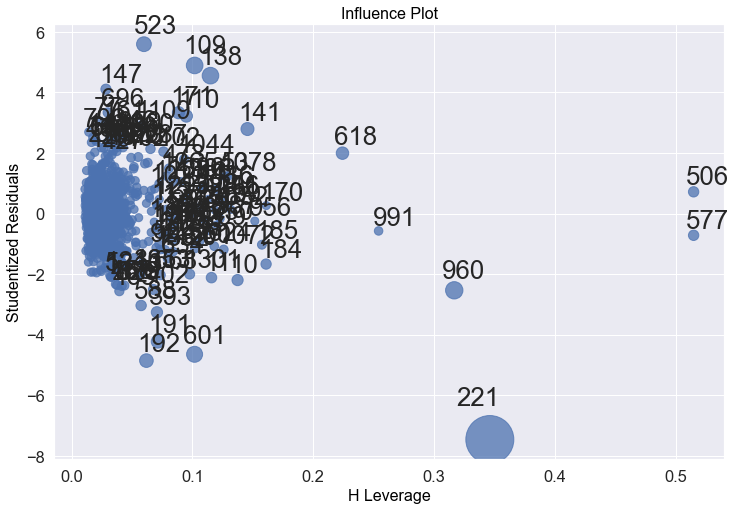

In [ ]:
# Cook's distance with high leverage
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(fitted_full_model, ax=ax, criterion="cooks", s=2)

### 잔차패턴확인

Text(0, 0.5, 'Residual')

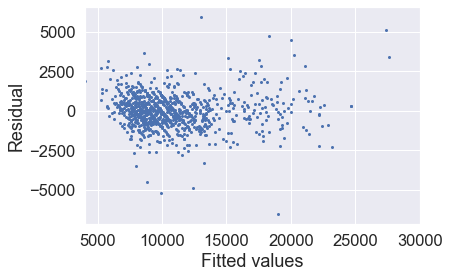

In [ ]:
# residual pattern 확인
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')